In [1]:
!pip install yfinance matplotlib seaborn plotly


In [2]:

#import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [4]:
# Download stock data from Yahoo Finance
stocks = ["AAPL", "TSLA", "^NSEI"]  # Apple, Tesla, Nifty 50
data = yf.download(stocks, start="2020-01-01", end="2025-01-01")["Close"]

# Preview
data.head()


/tmp/ipython-input-3377779919.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks, start="2020-01-01", end="2025-01-01")["Close"]
[*********************100%***********************]  3 of 3 completed


Ticker,AAPL,TSLA,^NSEI
Date,,,
2020-01-01,NaN,NaN,12182.500000
2020-01-02,72.538521,28.684000,12282.200195
2020-01-03,71.833298,29.534000,12226.650391
2020-01-06,72.405670,30.102667,11993.049805
2020-01-07,72.065147,31.270666,12052.950195


In [5]:
# data cleaning
# Check missing values
print(data.isnull().sum())

# Fill missing data
data = data.fillna(method="ffill")

# Basic statistics
print(data.describe())


Ticker
AAPL     38
TSLA     38
^NSEI    59
dtype: int64
Ticker         AAPL         TSLA         ^NSEI
count   1295.000000  1295.000000   1296.000000
mean     151.914167   213.579258  17355.721573
std       41.876737    83.274028   4187.087637
min       54.316944    24.081333   7610.250000
25%      126.972988   174.014999  14861.099854
50%      150.452759   220.250000  17530.575195
75%      176.836189   260.034988  19661.100098
max      258.103729   479.859985  26216.050781


/tmp/ipython-input-3618014692.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="ffill")


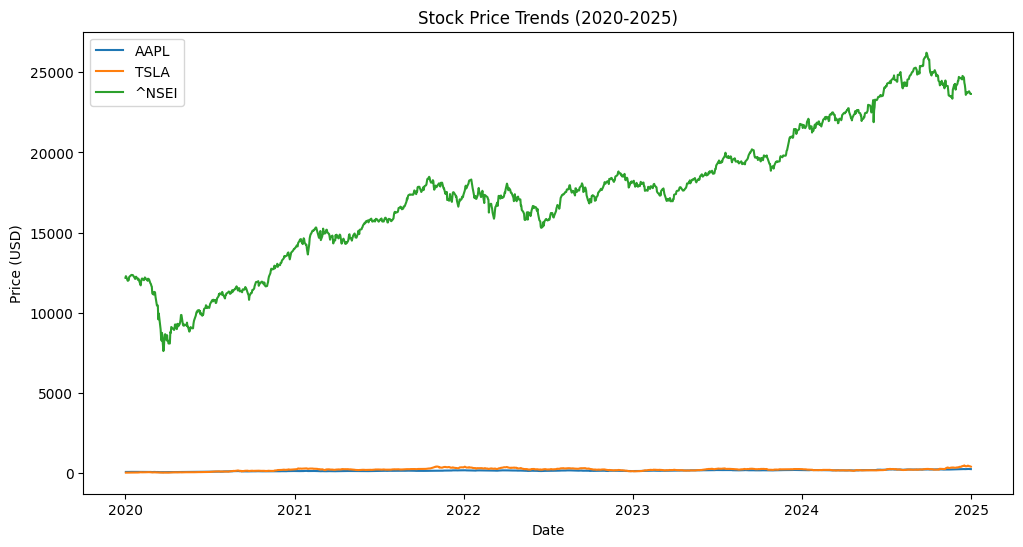

In [6]:
#stock price trend
plt.figure(figsize=(12,6))
for stock in data.columns:
    plt.plot(data[stock], label=stock)
plt.legend()
plt.title("Stock Price Trends (2020-2025)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


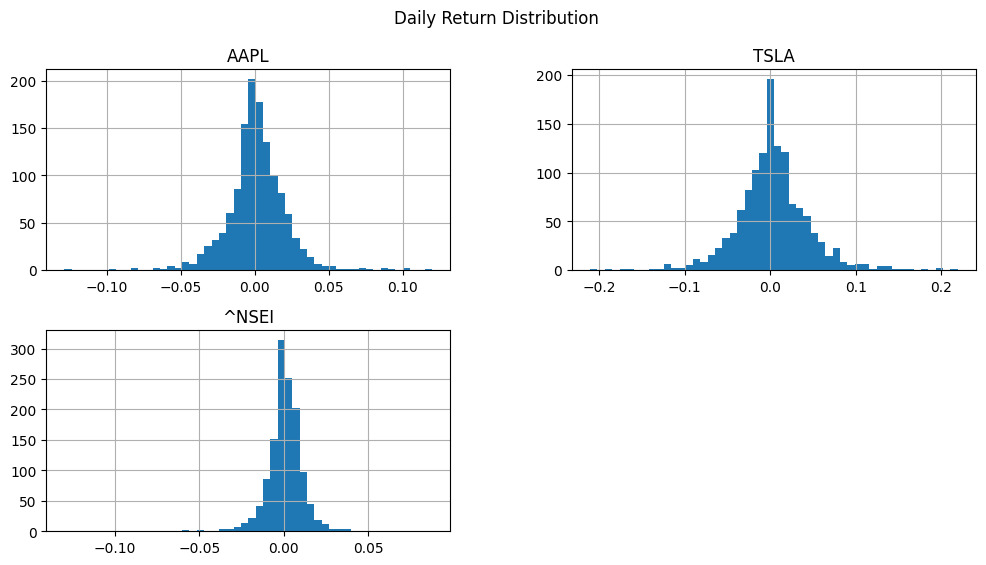

In [7]:
#daily return
returns = data.pct_change().dropna()

# Histogram of returns
returns.hist(bins=50, figsize=(12,6))
plt.suptitle("Daily Return Distribution")
plt.show()


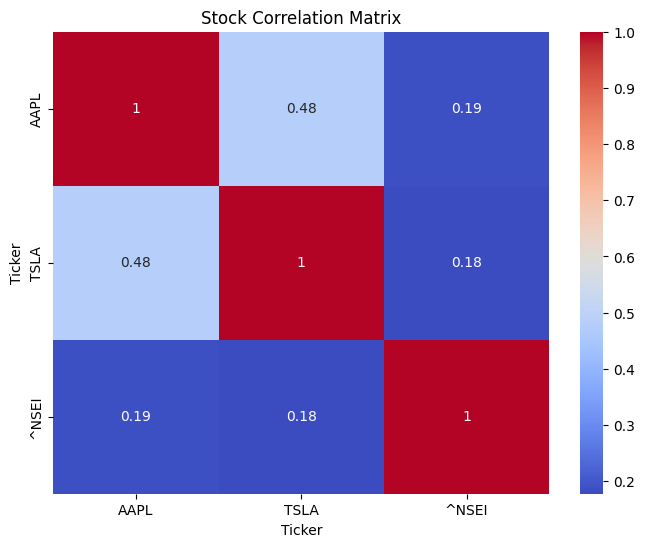

In [8]:
# correlation between assets
plt.figure(figsize=(8,6))
sns.heatmap(returns.corr(), annot=True, cmap="coolwarm")
plt.title("Stock Correlation Matrix")
plt.show()


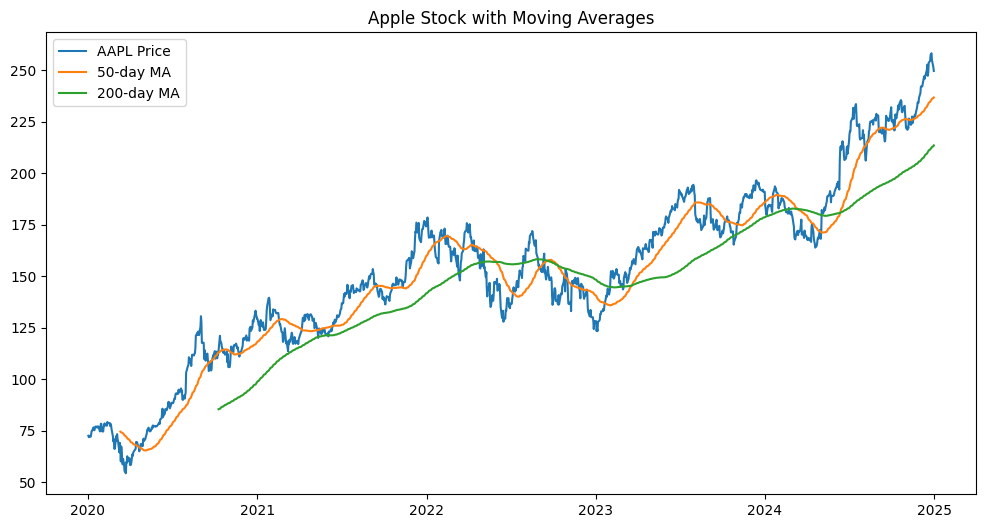

In [9]:
# moving averages
apple = data["AAPL"]
apple_ma50 = apple.rolling(50).mean()
apple_ma200 = apple.rolling(200).mean()

plt.figure(figsize=(12,6))
plt.plot(apple, label="AAPL Price")
plt.plot(apple_ma50, label="50-day MA")
plt.plot(apple_ma200, label="200-day MA")
plt.legend()
plt.title("Apple Stock with Moving Averages")
plt.show()


In [10]:
#interactive visulalization
fig = px.line(data, x=data.index, y=data.columns, title="Stock Price Trends (Interactive)")
fig.show()


In [11]:
#prepare data for prediction
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Use only AAPL data
apple = data[["AAPL"]].dropna()

# Create a target column = next day's price
apple["Target"] = apple["AAPL"].shift(-1)

# Drop last row (NaN in target)
apple = apple.dropna()

# Features (X) = today's price
X = apple[["AAPL"]].values
y = apple["Target"].values

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)


In [12]:
# train linear reression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
preds = model.predict(X_test)


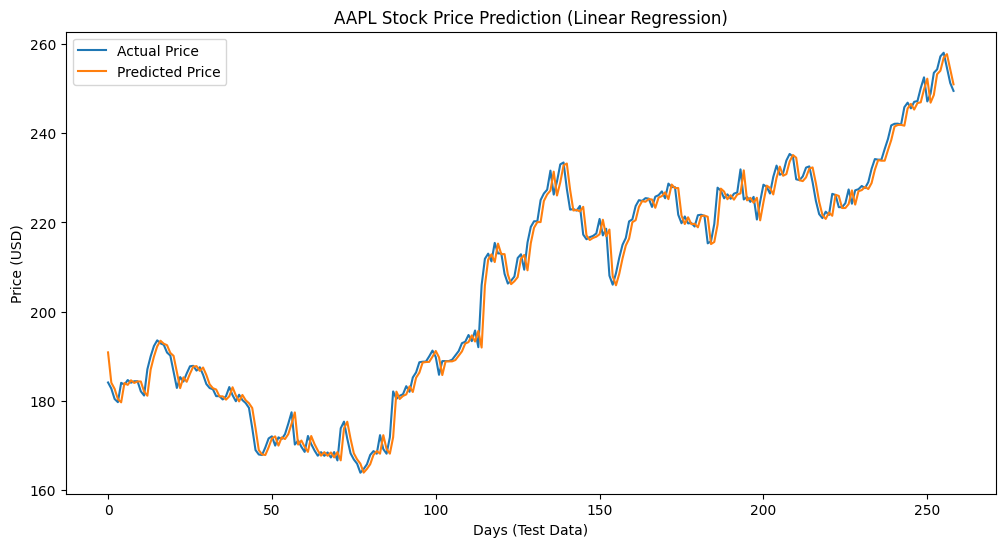

In [13]:
#visualize predictions vs actual
plt.figure(figsize=(12,6))
plt.plot(y_test, label="Actual Price")
plt.plot(preds, label="Predicted Price")
plt.legend()
plt.title("AAPL Stock Price Prediction (Linear Regression)")
plt.xlabel("Days (Test Data)")
plt.ylabel("Price (USD)")
plt.show()


In [14]:
#predict next day price
# Last available price
last_price = data["AAPL"].iloc[-1]

# Predict next day
next_day_price = model.predict(np.array([[last_price]]))[0]
print(f"Predicted Next Day Price for AAPL: ${next_day_price:.2f}")


Predicted Next Day Price for AAPL: $249.25
